In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from __future__ import division
import pandas as pd
import requests 
from dotenv import load_dotenv
import os
import json

In [2]:
load_dotenv()

True

In [3]:
quandl_api = os.getenv("quandl_api")

In [4]:
type(quandl_api)

str

In [5]:
import quandl
y_tif_equity = quandl.get("WIKI/TIF",start_date="2017-01-01",end_date="2018-01-01")["Close"]
y_tif_equity

Date
2017-01-03     77.79
2017-01-04     79.26
2017-01-05     76.81
2017-01-06     77.16
2017-01-09     76.84
               ...  
2017-12-22    102.84
2017-12-26    105.20
2017-12-27    105.24
2017-12-28    104.22
2017-12-29    103.95
Name: Close, Length: 250, dtype: float64

In [6]:
gold = quandl.get('LBMA/GOLD', start_date="2017-01-01",end_date="2018-01-01")
gold = gold.rename(columns={'USD (PM)': 'gold'})
gold = gold["gold"]


In [7]:
silver = quandl.get('LBMA/SILVER', start_date="2017-01-01",end_date="2018-01-01")
silver = silver.rename(columns={'USD': 'silver'})["silver"]


In [8]:
x_closing_prices_df = pd.DataFrame()
x_closing_prices_df = pd.concat([gold, silver], axis=1)


In [9]:
new_dataframe = x_closing_prices_df.merge(y_tif_equity,left_index=True, right_index=True)

In [10]:
new_dataframe.rename(columns={"gold":"Gold","silver":"Silver","Close":"TIF Close"},inplace=True)

In [11]:
new_dataframe.dropna(inplace=True)

In [12]:
y = new_dataframe["TIF Close"].values
x = new_dataframe.drop(columns="TIF Close").values

In [13]:
from sklearn.model_selection import train_test_split
#splitting the data to train the model and using 30% of the data for training and 70% for actual data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [16]:
model.predict([[1000,12]])

array([81.15663332])

In [17]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)

In [18]:
r2_score

0.38535745862565896

Text(0, 0.5, 'Predicted Data')

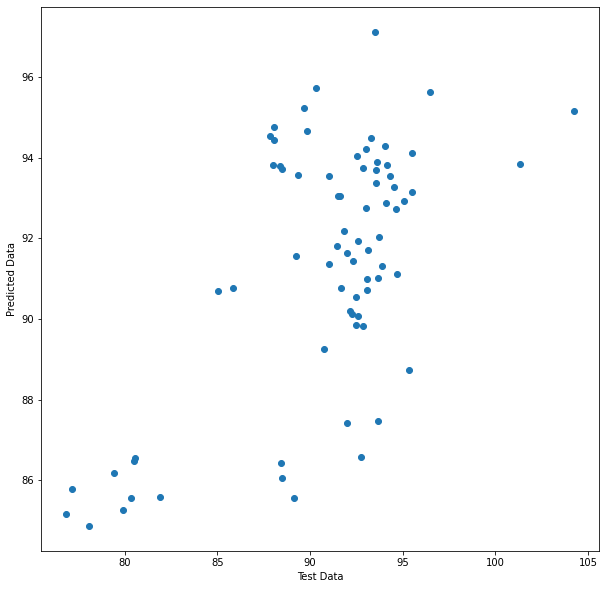

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)

In [43]:
poly.fit(x_poly,y)

PolynomialFeatures(degree=4)

In [44]:
lin2 = LinearRegression()

In [45]:
lin2.fit(x_poly,y)

LinearRegression()

In [46]:
model.predict([[1000,12]])

array([81.15663332])

In [47]:
lin2.predict(poly.fit_transform([[1000,12]]))

array([200.15651833])

In [48]:
y_prev = new_dataframe["TIF Close"]
x_prev = new_dataframe.drop(columns="TIF Close")

In [49]:
x_prev.join(y_prev)

,Gold,Silver,TIF Close
Date,,,
2017-01-03,1151.00,15.950,77.79
2017-01-04,1164.25,16.420,79.26
2017-01-05,1176.70,16.590,76.81
2017-01-06,1175.85,16.450,77.16
2017-01-09,1178.50,16.520,76.84
...,...,...,...
2017-12-19,1260.35,16.155,100.42
2017-12-20,1264.55,16.185,100.05
2017-12-21,1264.55,16.145,102.46


In [50]:
lin2.predict(poly.fit_transform([[1150,16]]))
             

array([78.7840648])

In [53]:
import statsmodels.api as sm

In [74]:
mod_poly_2 = sm.OLS(y,x_poly).fit()

In [75]:
mod_lin_1 = sm.OLS(x_train,y_train).fit()

In [78]:
mod_lin_1.summary()

ValueError: shapes (170,2) and (170,2) not aligned: 2 (dim 1) != 170 (dim 0)

In [79]:
mod_poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     40.30
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           2.15e-45
Time:                        14:12:30   Log-Likelihood:                -628.78
No. Observations:                 244   AIC:                             1280.
Df Residuals:                     233   BIC:                             1318.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0140      0.019     -0.738      0.461      -0.051       0.023
x1            -8.2097      5.175     -1.586      0.114     -18.406       1.987
x2            -0.1094      0.070     -1.559      0.120      -0.248       0.029
x3             0.0251      0.010      2.523      0.012       0.005       0.045
x4            -0.3933      0.668     -0.589      0.556      -1.708       0.922
x5            -0.3128      0.123     -2.545      0.012      -0.555      -0.071
x6            -0.0003      0.000     -2.811      0.005      -0.001   -9.95e-05
x7             0.0673      0.026      2.599      0.010       0.016       0.118
x8            -4.7889      1.869     -2.563      0.011      -8.471      -1.107
x9           114.4775     45.680      2.506      0.013      24.479     204.475
x10         3.036e-07   1.01e-07      3.016      0.003    1.05e-07    5.02e-07
x11        -6.796e-05   2.31e-05     -2.946      0.004      -0.000   -2.25e-05
x12            0.0054      0.002      2.846      0.005       0.002       0.009
x13           -0.1683      0.069     -2.429      0.016      -0.305      -0.032
x14            1.3989      1.118      1.251      0.212      -0.805       3.602
==============================================================================
Omnibus:                        0.881   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.609
Skew:                          -0.090   Prob(JB):                        0.738
Kurtosis:                       3.165   Cond. No.                     1.95e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+18. This might indicate that there are
strong multicollinearity or other numerical problems.
"""